## 사전설정

### 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 불러오기

In [3]:
df = pd.read_csv('E:\\2024 프로그래머스 데이터 분석 데브코스\\데이터 분석\\9주차\\2차프로젝트\\Programmer-Data-Analysis-2nd\\Seokjun\\data\\Preprocessed_BankChurners.csv')
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,2,2,3,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,4,1,1,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,4,2,4,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,2,0,1,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,1,2,3,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,1,44,1,2,4,2,2,0,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,1,51,1,4,0,2,5,2,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,1,32,1,0,2,0,3,1,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,1,37,1,3,1,1,3,0,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,1,48,1,2,4,1,4,0,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


### 스타일 설정

In [4]:
sns.set(style='whitegrid', palette='pastel', font_scale=0.8)

## 가설 검정

### 카드 사용 빈도와 이탈 여부

카드를 자주 사용하는 경우, 당사의 카드가 주로 사용되는 카드라고 해석할 수 있다. <br>
따라서 카드를 자주 사용한다면 이탈하지 않을 확률이 높다.

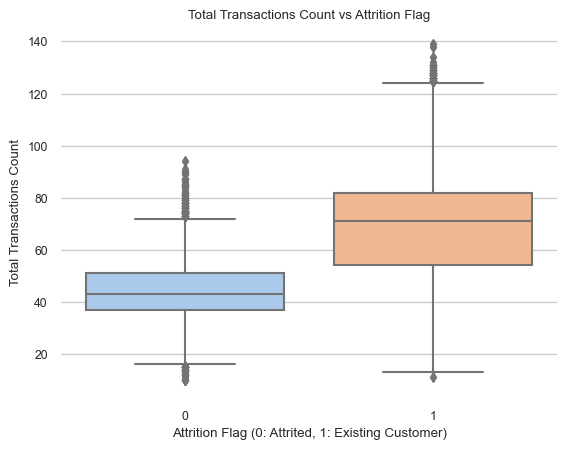

In [5]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)
plt.title('Total Transactions Count vs Attrition Flag')
plt.xlabel('Attrition Flag (0: Attrited, 1: Existing Customer)')
plt.ylabel('Total Transactions Count')
sns.despine(left=True, bottom=True)
plt.show()

> 이탈한 사용자에 비해 이탈하지 않은 사용자가 확연하게 높게 나타나는 것을 알 수 있음.

### 신용 한도와 이탈 여부

미국의 경우 신용 등급의 기준에 '카드와 계좌의 수'도 포함이 된다고 한다. <br>
따라서 신용 한도가 낮다면, 신용등급을 올리기 위해 이탈할 가능성이 있을 것이다.

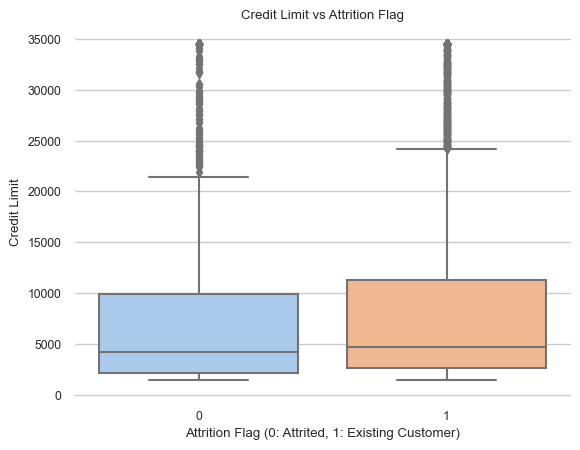

In [6]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)
plt.title('Credit Limit vs Attrition Flag')
plt.xlabel('Attrition Flag (0: Attrited, 1: Existing Customer)')
plt.ylabel('Credit Limit')
sns.despine(left=True, bottom=True)
plt.show()

> 차이가 분명하진 않지만 이탈하지 않은 고객의 신용 한도가 더욱 높은 것을 알 수 있음.

### 카드의 신규 가입 여부와 이탈 여부

미국의 경우 ‘5/24(24개월 이내 5개 신용카드 이상 신청불가)’라는 조항이 있어 카드 신청과 해지에 조심스러울 것이다. <br>
따라서 카드를 신규가입한 경우 이탈하지 않을 것이라는 가설을 세울 수 있다.

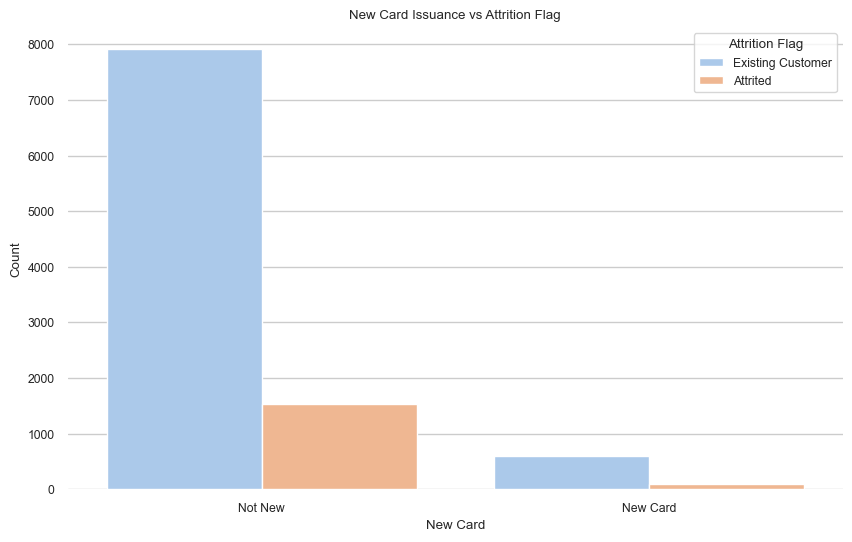

In [7]:
# 신규 카드를 발급받은 여부를 나타내는 열 추가 (신규 발급을 Months_on_book < 24로 가정)
df['New_Card'] = df['Months_on_book'].apply(lambda x: "New Card" if x < 24 else "Not New")
df['Attrition_Flag_Str'] = df['Attrition_Flag'].apply(lambda x: "Attrited" if x == 0 else "Existing Customer")

plt.figure(figsize=(10, 6))
sns.countplot(x='New_Card', hue='Attrition_Flag_Str', data=df)
plt.title('New Card Issuance vs Attrition Flag')
plt.xlabel('New Card')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
sns.despine(left=True, bottom=True)
plt.show()


> 뚜렷한 차이가 보이지 않음. 더욱 자세히 보기 위해 비율 기반의 시각화가 필요해보임.

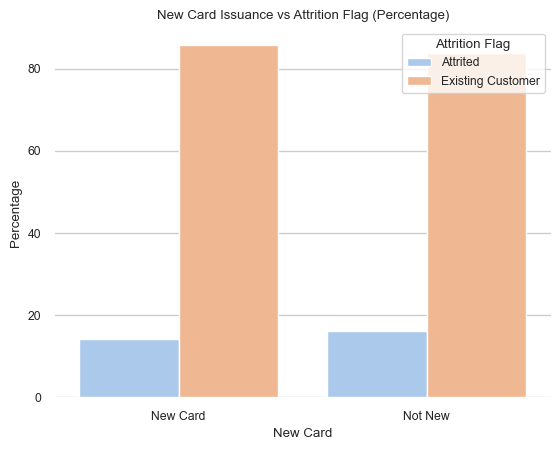

In [8]:
df['New_Card'] = df['Months_on_book'].apply(lambda x: "New Card" if x < 24 else "Not New")
df['Attrition_Flag_Str'] = df['Attrition_Flag'].apply(lambda x: "Attrited" if x == 0 else "Existing Customer")

new_card_counts = df.groupby(['New_Card', 'Attrition_Flag_Str']).size().reset_index(name='counts')
new_card_counts['percentage'] = new_card_counts['counts'] / new_card_counts.groupby('New_Card')['counts'].transform('sum') * 100

sns.barplot(x='New_Card', y='percentage', hue='Attrition_Flag_Str', data=new_card_counts)
plt.title('New Card Issuance vs Attrition Flag (Percentage)')
plt.xlabel('New Card')
plt.ylabel('Percentage')
plt.legend(title='Attrition Flag')
sns.despine(left=True, bottom=True)
plt.show()

> 신규 가입 고객의 이탈률이 조금 더 낮게 관측됨.

c:\Users\seokj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\seokj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


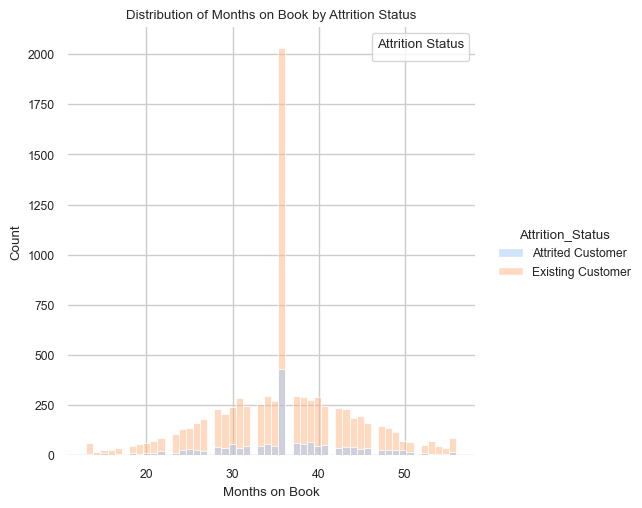

In [9]:
df['Attrition_Status'] = df['Attrition_Flag'].apply(lambda x: "Attrited Customer" if x == 0 else "Existing Customer")
df['Attrition_Status'] = df['Attrition_Status'].astype('category')

sns.displot(data=df, x='Months_on_book', hue='Attrition_Status', multiple='layer', kind='hist')
plt.title('Distribution of Months on Book by Attrition Status')
plt.xlabel('Months on Book')
plt.ylabel('Count')
plt.legend(title='Attrition Status')
sns.despine(left=True, bottom=True)
plt.show()

### Open To Buy 데이터와 한도 - 사용 금액 데이터 비교

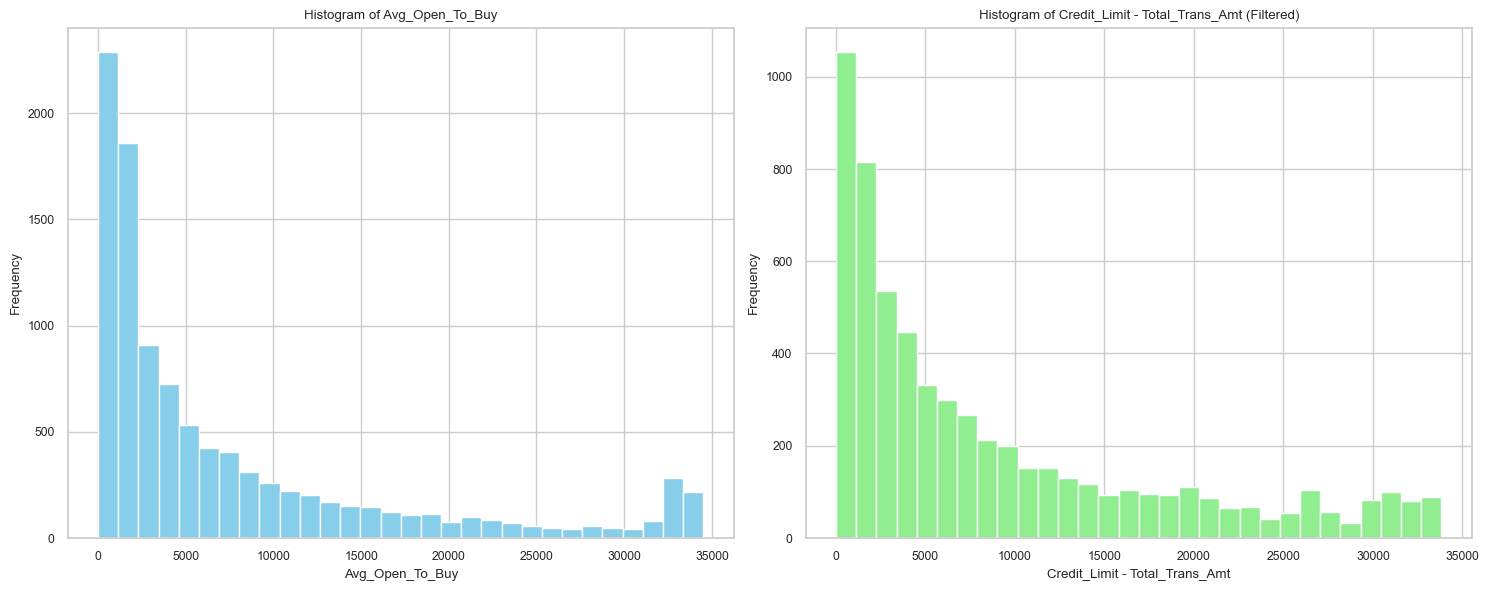

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(df['Avg_Open_To_Buy'], bins=30, color='skyblue')
axes[0].set_title('Histogram of Avg_Open_To_Buy')
axes[0].set_xlabel('Avg_Open_To_Buy')
axes[0].set_ylabel('Frequency')

available_credit = df['Credit_Limit'] - df['Total_Trans_Amt']
filtered_credit = available_credit[available_credit > 0]
axes[1].hist(filtered_credit, bins=30, color='lightgreen')
axes[1].set_title('Histogram of Credit_Limit - Total_Trans_Amt (Filtered)')
axes[1].set_xlabel('Credit_Limit - Total_Trans_Amt')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

> 완전히 같은 데이터는 아니지만 동일한 경향성의 띄며 Avg_Open_To_Buy의 값이 두 배 가량 높다, 이는 Avg_Open_To_Buy가 금액 데이터가 아님을 알 수 있다. <br>
> 분석시에는 Avg_Open_To_Buy 데이터를 사용하여 분석하는 편이 정확할 것으로 예상된다.

## 데이터 예측을 기반으로 한 신규 변수 생성

### 제작 가능한 변수는?

- Revolving과 open_to_buy등을 활용해서 '假)소비습관(Spending_Habit)' 제작
- Q4_Q1이나 Total등을 활용해서 '假)메인 카드(Main Card)' 제작
- Contacts_Count_12_mon, Income_Category대비 Card_Category등을 활용해서 '假)금융 리터러시(Financial Literacy)' 제작
- Dependent_count, Total_Trans_Ct대비 Total_Trans_Amt, Avg_Open_To_Buy등을 활용해서 '假)우량 고객(Valuable Customer)' 제작

### 변수 제작시 사용할 컬럼의 타당성과 반영 비율

#### Spending_Habit

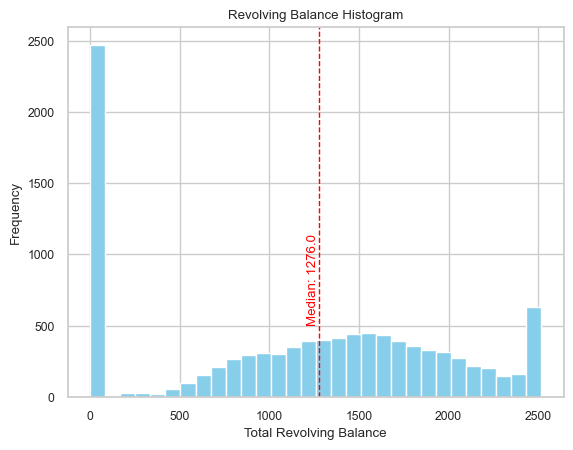

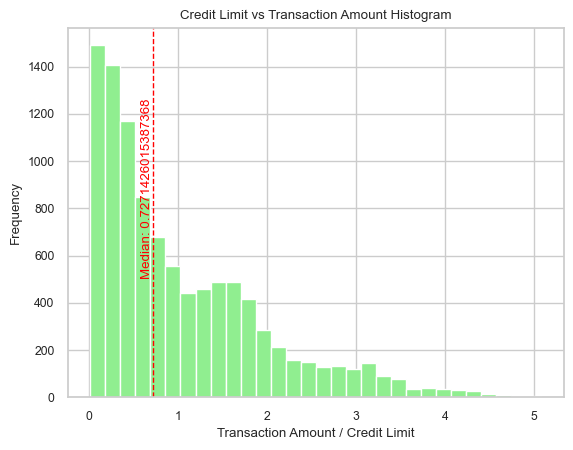

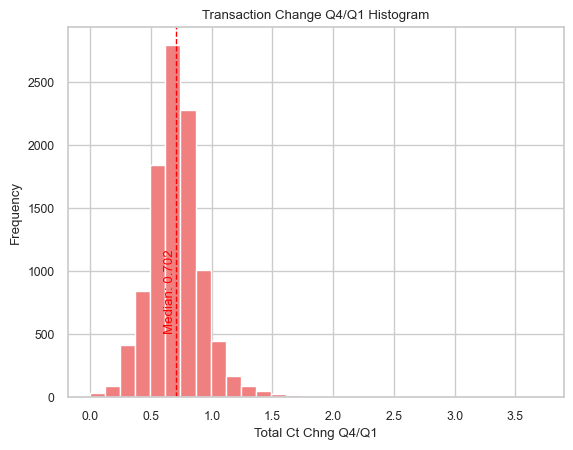

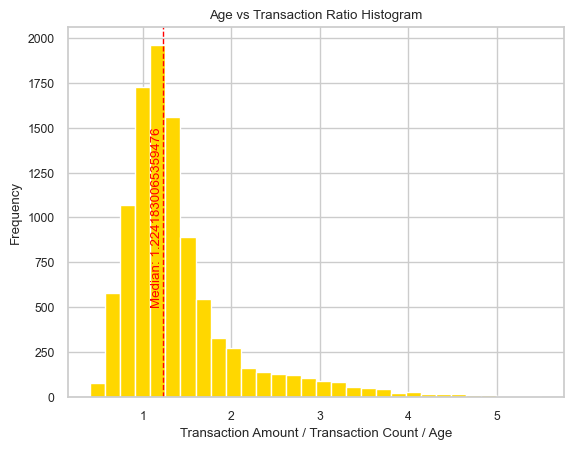

In [11]:
# Spending_Habit

# 리볼빙 잔액이 많으면 감점요인
# - Total_Revolving_bal 히스토그램
plt.hist(df['Total_Revolving_Bal'], bins=30, color='skyblue')
plt.title('Revolving Balance Histogram')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Frequency')
median = df['Total_Revolving_Bal'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 신용 한도 대비 거래 금액이 많으면 감점요인
# - Credit_Limit대비 Total_Trans_Amt 히스토그램
ratio = df['Total_Trans_Amt'] / df['Credit_Limit']
plt.hist(ratio, bins=30, color='lightgreen')
plt.title('Credit Limit vs Transaction Amount Histogram')
plt.xlabel('Transaction Amount / Credit Limit')
plt.ylabel('Frequency')
median = ratio.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 4분기 총 거래 건수 대비 1분기의 비율이 많거나 적으면 -> 소비 금액이 불규칙하면 감점요인
# - Total_Ct_Chng_Q4_Q1 히스토그램
plt.hist(df['Total_Ct_Chng_Q4_Q1'], bins=30, color='lightcoral')
plt.title('Transaction Change Q4/Q1 Histogram')
plt.xlabel('Total Ct Chng Q4/Q1')
plt.ylabel('Frequency')
median = df['Total_Ct_Chng_Q4_Q1'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 나이가 어리면서 거래 건수 대비 거래 금액이 높으면 감점요인
# - Customer_Age대비 Total_Trans_Amt / Total_Trans_Ct 히스토그램
ratio = df['Total_Trans_Amt'] / df['Total_Trans_Ct'] / df['Customer_Age']
plt.hist(ratio, bins=30, color='gold')
plt.title('Age vs Transaction Ratio Histogram')
plt.xlabel('Transaction Amount / Transaction Count / Age')
plt.ylabel('Frequency')
median = ratio.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

In [12]:
def calculate_spending_habit(df):
    """
    Calculate the consumption habit ratio.

    Args:
    df (DataFrame): Input DataFrame containing relevant columns.

    Returns:
    float: Consumption habit ratio (100 to 0).
    """
    # 리볼빙 잔액에 대한 감점 계산
    max_revolv_bal = df['Total_Revolving_Bal'].max()
    min_revolv_bal = df['Total_Revolving_Bal'].min()
    revolv_bal_score = ((df['Total_Revolving_Bal'] - min_revolv_bal) / (max_revolv_bal - min_revolv_bal)) * 100

    # 신용 한도 대비 거래 금액에 대한 감점 계산
    trans_to_limit_ratio = df['Total_Trans_Amt'] / df['Credit_Limit']
    max_trans_to_limit_ratio = trans_to_limit_ratio.max()
    min_trans_to_limit_ratio = trans_to_limit_ratio.min()
    trans_to_limit_score = ((trans_to_limit_ratio - min_trans_to_limit_ratio) / (max_trans_to_limit_ratio - min_trans_to_limit_ratio)) * 100

    # 4분기 총 거래 건수 대비 1분기의 비율에 대한 감점 계산
    max_total_ct_chng_q4_q1 = df['Total_Ct_Chng_Q4_Q1'].max()
    min_total_ct_chng_q4_q1 = df['Total_Ct_Chng_Q4_Q1'].min()
    trans_change_q4q1_score = ((df['Total_Ct_Chng_Q4_Q1'] - min_total_ct_chng_q4_q1) / (max_total_ct_chng_q4_q1 - min_total_ct_chng_q4_q1)) * 100

    # 나이가 어리면서 거래 건수 대비 거래 금액에 대한 감점 계산
    trans_to_age_ratio = df['Total_Trans_Amt'] / df['Total_Trans_Ct'] / df['Customer_Age']**2
    max_trans_to_age_ratio = trans_to_age_ratio.max()
    min_trans_to_age_ratio = trans_to_age_ratio.min()
    trans_to_age_score = ((trans_to_age_ratio - min_trans_to_age_ratio) / (max_trans_to_age_ratio - min_trans_to_age_ratio)) * 100

    # 소비 습관 점수를 종합하여 0에서 100으로 변환
    consumption_habit_ratio = revolv_bal_score * 0.25 + trans_to_limit_score * 0.3 + trans_change_q4q1_score * 0.3 + trans_to_age_score * 0.15

    return consumption_habit_ratio


In [13]:
calculate_spending_habit(df=df)

0        21.773931
1        40.126489
2        24.294838
3        48.142665
4        21.987367
           ...    
10122    51.696170
10123    44.618228
10124    24.145610
10125    26.345040
10126    37.064298
Length: 10127, dtype: float64

#### Main_Card

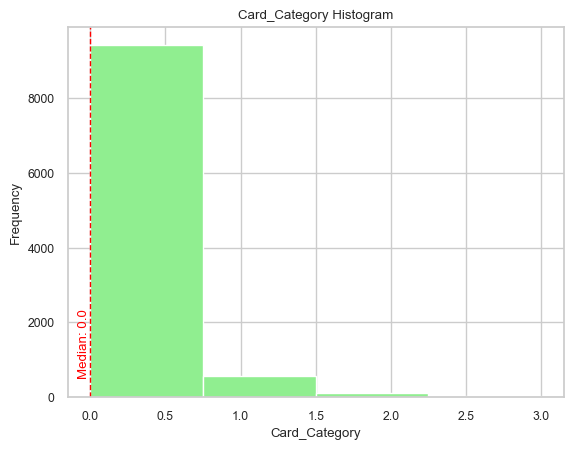

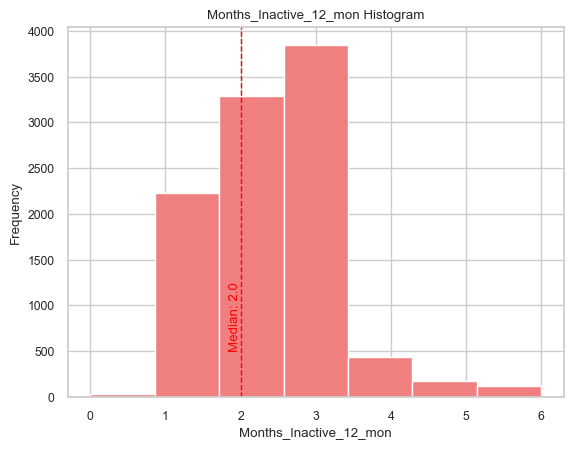

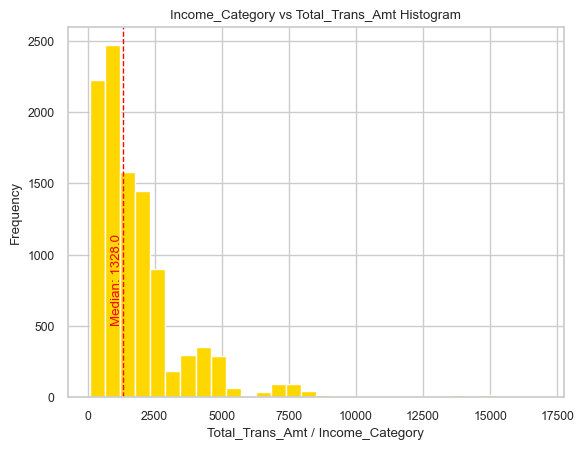

In [25]:
# Main_Card

# 신용 한도 대비 사용 금액이 낮다면 감점요인
# - Credit_Limit대비 Total_Trans_Amt 히스토그램
# ratio = df['Total_Trans_Amt'] / df['Credit_Limit']
# plt.hist(ratio, bins=30, color='skyblue')
# plt.title('Credit Limit vs Transaction Amount Histogram')
# plt.xlabel('Transaction Amount / Credit Limit')
# plt.ylabel('Frequency')
# median = ratio.median()
# plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
# plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
# plt.show()

# 신용카드 종류가 낮다면 감점요인
# - Card_Category 히스토그램
plt.hist(df['Card_Category'], bins=4, color='lightgreen')
plt.title('Card_Category Histogram')
plt.xlabel('Card_Category')
plt.ylabel('Frequency')
median = df['Card_Category'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 비활성화된 개월 수가 많다면 감점요인
# - Months_Inactive_12_mon 히스토그램
plt.hist(df['Months_Inactive_12_mon'], bins=7, color='lightcoral')
plt.title('Months_Inactive_12_mon Histogram')
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('Frequency')
median = df['Months_Inactive_12_mon'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 소득이 많으면서 결제 금액이 낮다면 감점요인
# - Income_Category대비 Total_Trans_Amt 히스토그램
ratio = df['Total_Trans_Amt'] / (df['Income_Category'] + 1)
plt.hist(ratio, bins=30, color='gold')
plt.title('Income_Category vs Total_Trans_Amt Histogram')
plt.xlabel('Total_Trans_Amt / Income_Category')
plt.ylabel('Frequency')
median = ratio.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

In [30]:
def calculate_main_card(df):
    """
    Calculate the main card score.

    Args:
    df (DataFrame): Input DataFrame containing relevant columns.

    Returns:
    float: Main card score (100 to 0).
    """

    # 신용카드 종류에 대한 감점 계산
    card_category_mapping = {0: 1, 1: 34, 2: 67, 3: 100}
    card_category_score = df['Card_Category'].map(card_category_mapping)

    # 비활성화된 개월 수에 대한 감점 계산
    inactive_months_mapping = {0: 100, 1: 90, 2: 80, 3: 60, 4: 40, 5: 20, 6: 0}
    months_inactive_score = df['Months_Inactive_12_mon'].map(inactive_months_mapping)

    # 소득 대비 결제 금액에 대한 감점 계산
    income_trans_ratio = df['Total_Trans_Amt'] / df['Income_Category']
    median_income_category = income_trans_ratio.median()
    max_income_category = income_trans_ratio.max()
    min_income_category = income_trans_ratio.min()
    income_trans_score = ((income_trans_ratio - min_income_category) / (max_income_category - min_income_category)) * 100
    income_trans_score = income_trans_score.where(income_trans_score >= median_income_category, 100)

    # 메인 카드 스코어를 종합하여 0에서 100으로 변환
    main_card_score = card_category_score * 0.4 + months_inactive_score * 0.25 + income_trans_score * 0.35

    return main_card_score


In [31]:
calculate_main_card(df=df)

0        57.9
1        57.9
2        57.9
3        45.4
4        57.9
         ... 
10122    55.4
10123    55.4
10124    50.4
10125    50.4
10126    68.6
Length: 10127, dtype: float64

### Financial_Literacy

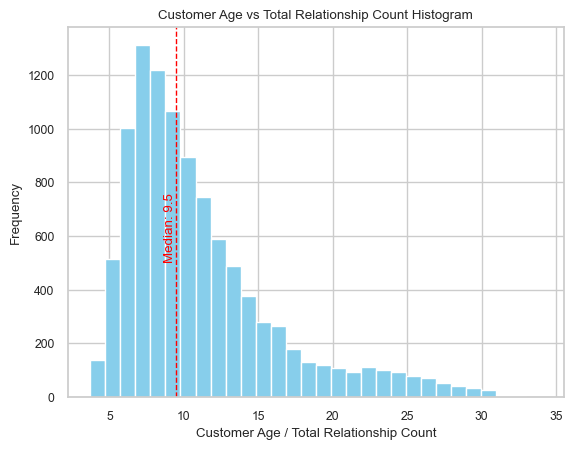

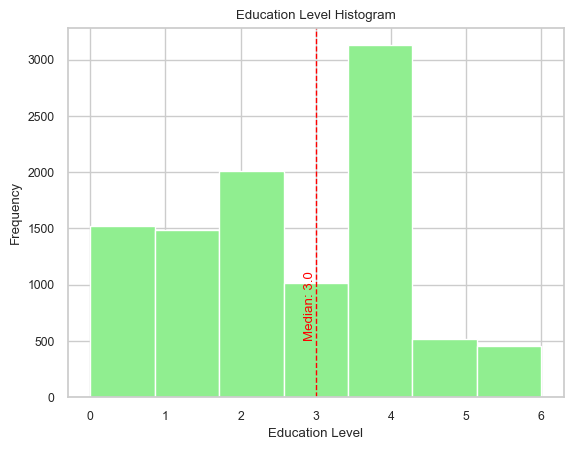

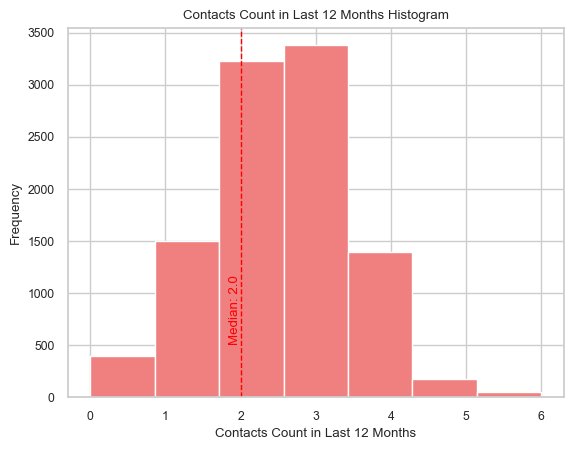

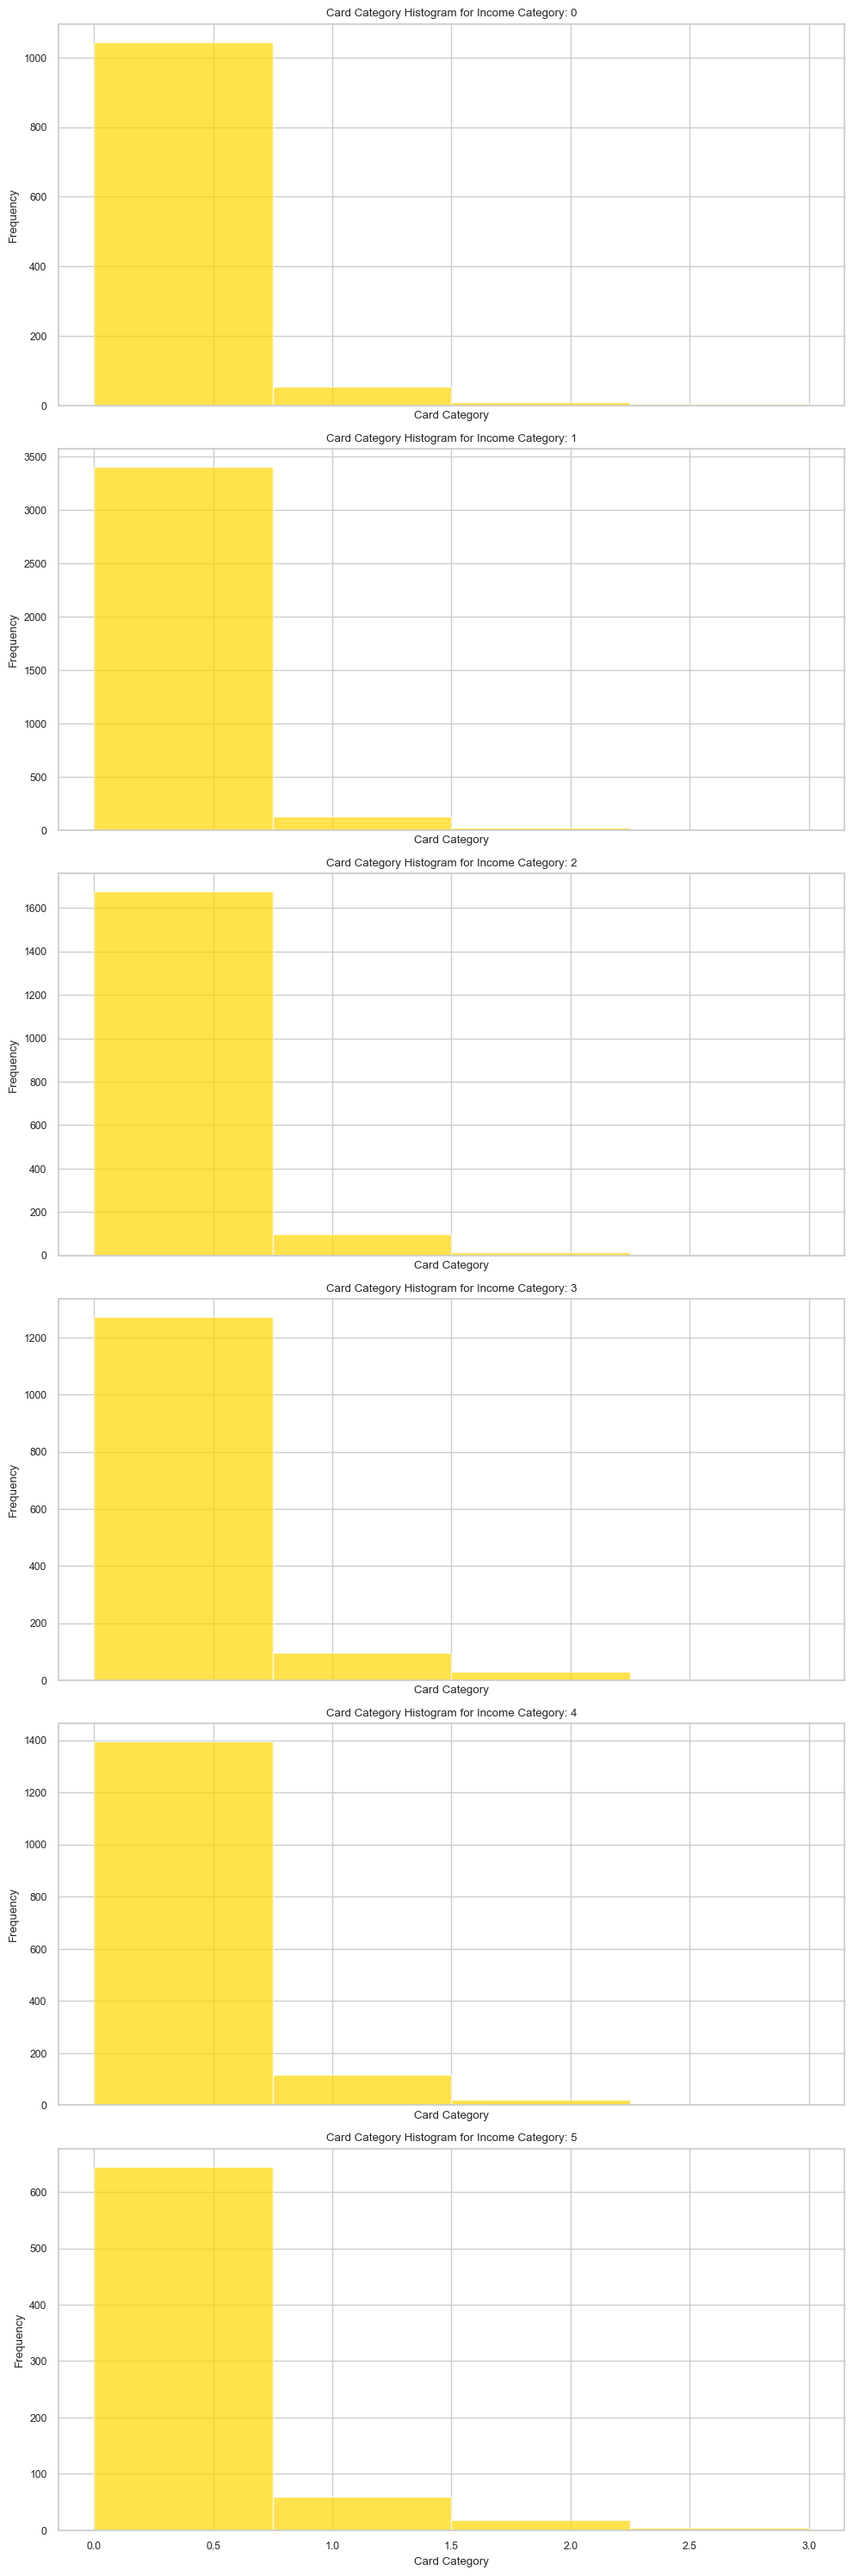

In [17]:
# Financial_Literacy

# 나이가 많은데 보유한 상품 수가 적다면 감점요인.
# - Total_Relationship_Count 대비 Customer_Age 히스토그램
ratio = df['Customer_Age'] / (df['Total_Relationship_Count'] + 1)
plt.hist(ratio, bins=30, color='skyblue')
plt.title('Customer Age vs Total Relationship Count Histogram')
plt.xlabel('Customer Age / Total Relationship Count')
plt.ylabel('Frequency')
median = ratio.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 최종학력이 낮다면 감점요인.
# - Education_Level 히스토그램
plt.hist(df['Education_Level'], bins=7, color='lightgreen')
plt.title('Education Level Histogram')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
median = df['Education_Level'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 은행을 자주 방문하지 않았다면 감점요인.
# - Contacts_Count_12_mon 히스토그램
plt.hist(df['Contacts_Count_12_mon'], bins=7, color='lightcoral')
plt.title('Contacts Count in Last 12 Months Histogram')
plt.xlabel('Contacts Count in Last 12 Months')
plt.ylabel('Frequency')
median = df['Contacts_Count_12_mon'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 소득 범위가 높은데 카드 종류가 낮다면 감점요인.
# - Income_Category 별 Card_Category 히스토그램
income_categories = df['Income_Category'].unique()
income_categories = sorted(income_categories)
n_categories = len(income_categories)
fig, axes = plt.subplots(n_categories, 1, figsize=(10, 5 * n_categories), sharex=True)

for i, income_category in enumerate(income_categories):
    subset = df[df['Income_Category'] == income_category]
    axes[i].hist(subset['Card_Category'], bins=4, alpha=0.7, color='gold')
    axes[i].set_title(f'Card Category Histogram for Income Category: {income_category}')
    axes[i].set_xlabel('Card Category')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [18]:
def calculate_financial_literacy(df):
    """
    Calculate the financial literacy score.

    Args:
    df (DataFrame): Input DataFrame containing relevant columns.

    Returns:
    float: Financial literacy score (100 to 0).
    """

    # 나이 대비 보유한 상품 수에 대한 감점 계산
    age_product_ratio = df['Customer_Age'] / df['Total_Relationship_Count']
    max_age_product_ratio = age_product_ratio.max()
    min_age_product_ratio = age_product_ratio.min()
    age_product_score = 100 - ((df['Customer_Age'] - min_age_product_ratio) / (max_age_product_ratio - min_age_product_ratio)) * 100

    # 최종학력에 대한 감점 계산
    max_education_level = df['Education_Level'].max()
    min_education_level = df['Education_Level'].min()
    education_level_score = 100 - ((df['Education_Level'] - min_education_level) / (max_education_level - min_education_level)) * 100

    # 은행을 방문한 횟수에 대한 감점 계산
    contact_count_mapping = {0: 0, 1: 20, 2: 40, 3: 60, 4: 80, 5: 90, 6: 100}
    contact_score = df['Contacts_Count_12_mon'].map(contact_count_mapping)

    # 소득 범위 대비 카드 종류에 대한 감점 계산
    income_card_ratio = df['Income_Category'] / df['Customer_Age']
    max_income_card_ratio = income_card_ratio.max()
    min_income_card_ratio = income_card_ratio.min()
    income_card_score = ((income_card_ratio - min_income_card_ratio) / (max_income_card_ratio - min_income_card_ratio)) * 100

    # 점수 종합.
    financial_literacy_score = age_product_score * 0.3 + education_level_score * 0.2 + contact_score * 0.2 + income_card_score * 0.3

    return financial_literacy_score

In [19]:
calculate_financial_literacy(df=df)

0        46.571030
1        26.803220
2        26.912432
3        34.427051
4        41.560384
           ...    
10122    33.388342
10123    52.332269
10124    44.187688
10125    46.972426
10126    38.074678
Length: 10127, dtype: float64

### Valuable_Customer

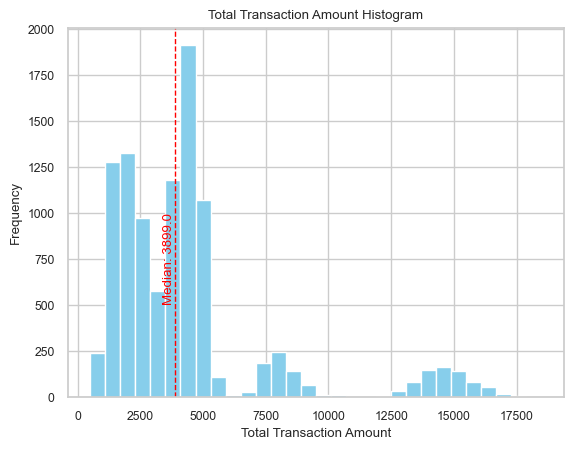

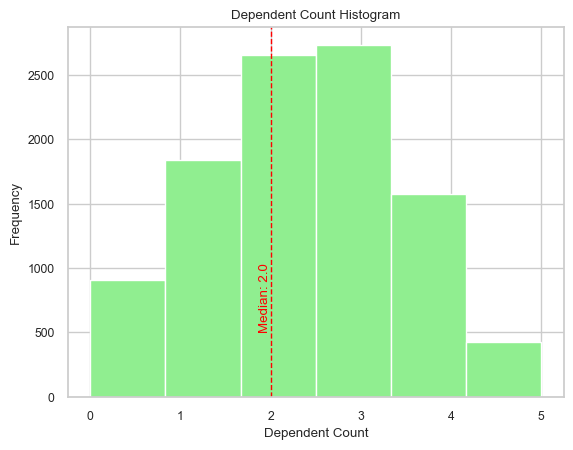

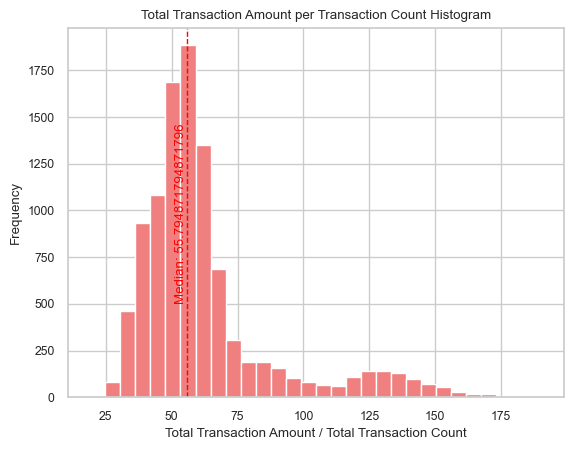

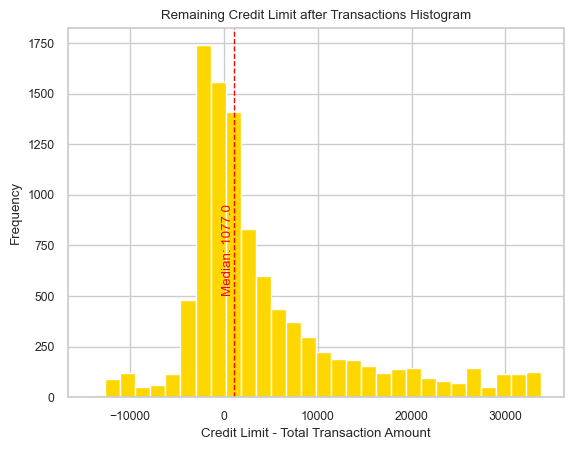

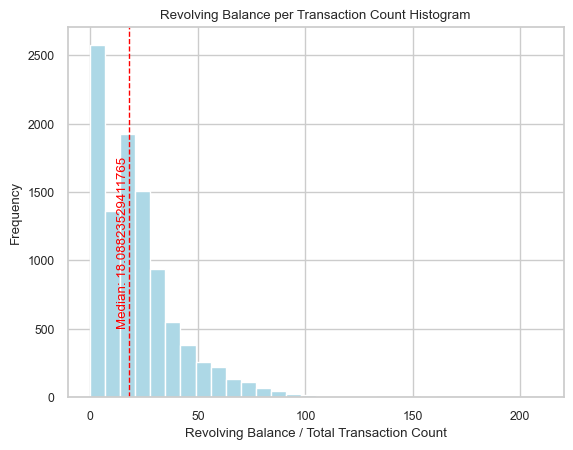

In [20]:
# Valuable_Customer

# 총 거래 금액이 적다면 감점요인
# - Total_Trans_Amt 히스토그램
plt.hist(df['Total_Trans_Amt'], bins=30, color='skyblue')
plt.title('Total Transaction Amount Histogram')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
median = df['Total_Trans_Amt'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 부양 가족이 적다면 감점요인.
# - Dependent_count 히스토그램
plt.hist(df['Dependent_count'], bins=6, color='lightgreen')
plt.title('Dependent Count Histogram')
plt.xlabel('Dependent Count')
plt.ylabel('Frequency')
median = df['Dependent_count'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 한번 결제할 때 적은 금액을 지출한다면 감점요인.
# - Total_Trans_Amt / Total_Trans_Ct 히스토그램
ratio = df['Total_Trans_Amt'] / df['Total_Trans_Ct']
plt.hist(ratio, bins=30, color='lightcoral')
plt.title('Total Transaction Amount per Transaction Count Histogram')
plt.xlabel('Total Transaction Amount / Total Transaction Count')
plt.ylabel('Frequency')
median = ratio.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# (신용 한도 - 총 거래 금액)이 많다면 감점요인.
# - Credit_Limit - Total_Trans_Amt 히스토그램
plt.hist(df['Credit_Limit'] - df['Total_Trans_Amt'], bins=30, color='gold')
plt.title('Remaining Credit Limit after Transactions Histogram')
plt.xlabel('Credit Limit - Total Transaction Amount')
plt.ylabel('Frequency')
median = (df['Credit_Limit'] - df['Total_Trans_Amt']).median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# 리볼빙 잔액이 많고 총 거래 횟수가 적다면 감점요인.
# - Total_Revolving_bal 대비 Total_Trans_Ct 히스토그램
ratio = df['Total_Revolving_Bal'] / df['Total_Trans_Ct']
plt.hist(ratio, bins=30, color='lightblue')
plt.title('Revolving Balance per Transaction Count Histogram')
plt.xlabel('Revolving Balance / Total Transaction Count')
plt.ylabel('Frequency')
median = ratio.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()


In [21]:
def calculate_valuable_customer(df):
    """
    Calculate the valuable customer score.

    Args:
    df (DataFrame): Input DataFrame containing relevant columns.

    Returns:
    float: Financial literacy score (100 to 0).
    """

    # 총 거래 금액에 대한 감점 계산
    median_total_trans_amt = df['Total_Trans_Amt'].median()
    max_total_trans_amt = df['Total_Trans_Amt'].max()
    min_total_trans_amt = df['Total_Trans_Amt'].min()
    total_trans_amt_score = ((df['Total_Trans_Amt'] - min_total_trans_amt) / (max_total_trans_amt - min_total_trans_amt)) * 100
    total_trans_amt_score = total_trans_amt_score.where(total_trans_amt_score <= median_total_trans_amt, 100)

    # 부양 가족의 수에 대한 감점 계산
    max_dependent_count = df['Dependent_count'].max()
    min_dependent_count = df['Dependent_count'].min()
    dependent_count_score = ((df['Education_Level'] - min_dependent_count) / (max_dependent_count - min_dependent_count)) * 100

    # 일회 결제 시 평균 사용 금액에 대한 감점 계산
    avg_spent_amt = df['Total_Trans_Amt'] / df['Total_Trans_Ct']
    max_avg_spent_amt = avg_spent_amt.max()
    min_avg_spent_amt = avg_spent_amt.min()
    spent_amt_score = ((avg_spent_amt - min_avg_spent_amt) / (max_avg_spent_amt - min_avg_spent_amt)) * 100

    # 신용 한도와 총 거래 금액의 차에 대한 감점 계산
    card_balance = df['Credit_Limit'] - df['Total_Trans_Amt']
    max_card_balance = card_balance.max()
    min_card_balance = card_balance.min()
    card_balance_score = 100 - ((card_balance - min_card_balance) / (max_card_balance - min_card_balance)) * 100

    # 리볼빙 잔액 대비 총 거래 횟수에 대한 감점 계산
    revolving_trans_ratio = df['Total_Revolving_Bal'] / df['Total_Trans_Ct']
    max_revolving_trans_ratio = revolving_trans_ratio.max()
    min_revolving_trans_ratio = revolving_trans_ratio.min()
    revolving_trans_score = ((revolving_trans_ratio - min_revolving_trans_ratio) / (max_revolving_trans_ratio - min_revolving_trans_ratio)) * 100

    # 점수 종합.
    financial_valuable_customer_score = total_trans_amt_score * 0.3 + dependent_count_score * 0.15 + spent_amt_score * 0.2 + card_balance_score * 0.2 + revolving_trans_score * 0.15

    return financial_valuable_customer_score


In [22]:
calculate_valuable_customer(df=df)

0        18.597263
1        28.687749
2        36.528450
3        33.893396
4        17.131119
           ...    
10122    70.185437
10123    44.595357
10124    56.245996
10125    54.123401
10126    62.156676
Length: 10127, dtype: float64

### Visualization

In [23]:
Spending_Habit = calculate_spending_habit(df=df)
Main_Card = calculate_main_card(df=df)
Financial_Literacy = calculate_financial_literacy(df=df)
Valuable_Customer = calculate_valuable_customer(df=df)

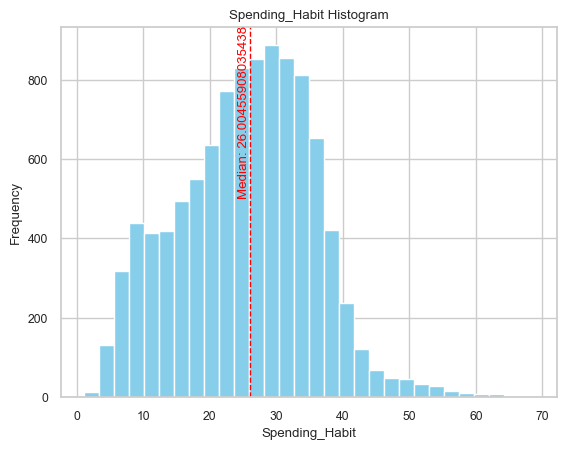

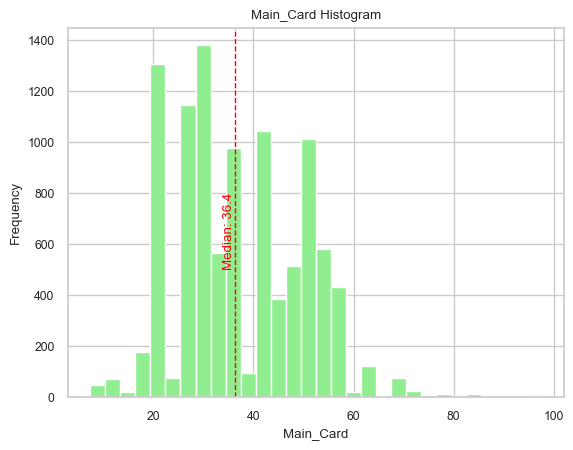

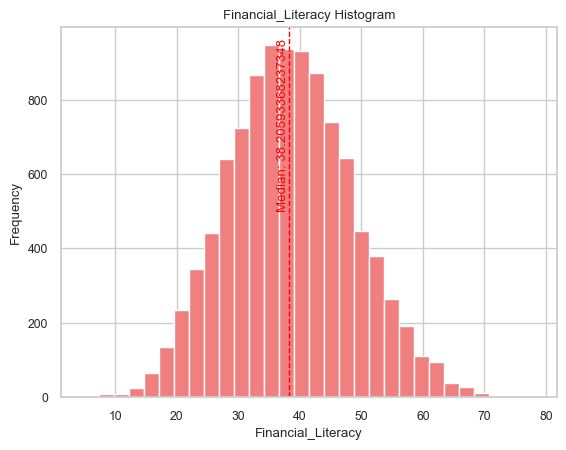

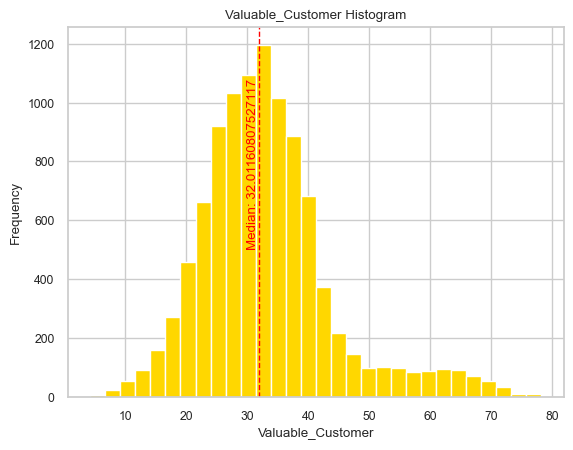

In [24]:
# Spending_Habit
plt.hist(Spending_Habit, bins=30, color='skyblue')
plt.title('Spending_Habit Histogram')
plt.xlabel('Spending_Habit')
plt.ylabel('Frequency')
median = Spending_Habit.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# Main_Card
plt.hist(Main_Card, bins=30, color='lightgreen')
plt.title('Main_Card Histogram')
plt.xlabel('Main_Card')
plt.ylabel('Frequency')
median = Main_Card.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# Financial_Literacy
plt.hist(Financial_Literacy, bins=30, color='lightcoral')
plt.title('Financial_Literacy Histogram')
plt.xlabel('Financial_Literacy')
plt.ylabel('Frequency')
median = Financial_Literacy.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()

# Valuable_Customer
plt.hist(Valuable_Customer, bins=30, color='gold')
plt.title('Valuable_Customer Histogram')
plt.xlabel('Valuable_Customer')
plt.ylabel('Frequency')
median = Valuable_Customer.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.text(median, 500, f'Median: {median}', rotation=90, va='bottom', ha='right', color='red')
plt.show()